In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install keras
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!which tesseract #to know the dir for Pytesseract is stored

/usr/bin/tesseract


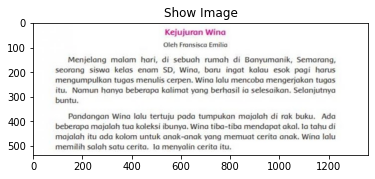

In [82]:
import pytesseract
import cv2
import matplotlib.pylab as plt
import numpy as np

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract' #we know from the !which tesseract command

img = cv2.imread('/content/drive/MyDrive/Capstone Project - Qutubuqu/ML/Final Submission/test_images/test2.jpeg')
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.title('Show Image')
plt.imshow(img)

In [70]:
img_to_char = pytesseract.image_to_string(img)
print(img_to_char)

Kejujuran Wina

Oleh Fransisca Emilia

Menjelang malam hari, di sebuah rumah di Banyumanik, Semarang,
seorang siswa kelas enam SD, Wina, baru ingat kalau esok pagi harus
mengumpulkan tugas menulis cerpen. Wina lalu mencoba mengerjakan tugas
itu. Namun hanya beberapa kalimat yang berhasil ia selesaikan. Selanjutnya
buntu.

Pandangan Wina Ialu tertuju pada tumpukan majalah di rak buku. Ada
beberapa majalah tua koleksi ibunya. Wina tiba-tiba mendapat akal. 1a tahu di
majalah itu ada kolom untuk anak-anak yang memuat cerita anak, Wina lalu
memilih salah satu cerita, 1a menyalin cerita itu.



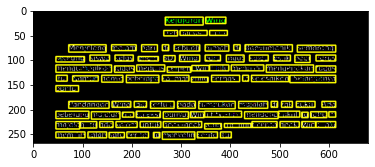

In [79]:
import numpy as np
normalize_img = np.zeros((img.shape[0], img.shape[1]))
img = cv2.normalize(img, normalize_img, 0, 255, cv2.NORM_MINMAX)
img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV) [1]
img = cv2.GaussianBlur(img, (1,1), 0)

plt.imshow(img)

Text detection


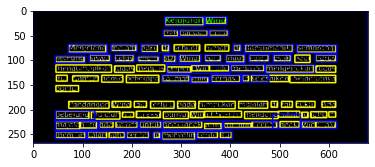

In [80]:
#Text detection

detect = (pytesseract.image_to_data(img))
for x, detect in enumerate(detect.splitlines()):
  if x != 0:
    detect = detect.split()
    if len(detect) == 12:
      x, y, w, h = int(detect[6]), int(detect[7]), int(detect[8]), int(detect[9])
      cv2.rectangle(img, (x,y), (w+x, h+y), (0,0,255), 2)

print('Text detection')
plt.imshow(img)

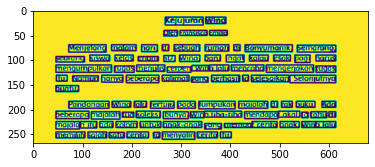

In [77]:
"""#Grayscaling the Images
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 91, 13)
setting = r"--psm 7"

plt.imshow(threshold)"""

In [81]:
#img_to_char = pytesseract.image_to_string(threshold, config=setting)
img_to_char = pytesseract.image_to_string(img)
print(img_to_char)

 

 

    
 
 

SEATTLE | Aco Us| OTST scan. WOES en TLCS
Oo formas] ker akey ead

eno

 

 

 

Rectermnts Jrtoce | svice] earwent Pesan] fon

 

 

 



**Text Classification**

In [ ]:
from keras.models import load_model

#Load Model
model = load_model("/content/sample_data/model.h5")

#Make prediction
sentence = 'img_to_char'
model.predict(sentence)